In [27]:
import pandas as pd
import numpy as np
from scipy import stats 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score, mean_squared_error


In [9]:
data = pd.read_csv('uber.csv')
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [10]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

data['pickup_hour'] = data['pickup_datetime'].dt.hour
data['pickup_day'] = data['pickup_datetime'].dt.dayofweek
data['pickup_month'] = data['pickup_datetime'].dt.month
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day,pickup_month
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,3,5
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,4,7
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,0,8
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,4,6
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,10,6,10
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1,4,3
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,0,0,6
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,14,2,5


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
 9   pickup_hour        200000 non-null  int32              
 10  pickup_day         200000 non-null  int32              
 11  pickup_month       200000 non-null  int32              
dtypes: datetime64[ns, UTC](1), flo

In [22]:
data = data.drop(['key','pickup_datetime'],axis = 1,errors = 'ignore')#preprocessing
data.head()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day,pickup_month
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,3,5
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,4,7
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,0,8
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,4,6
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,3,8


In [21]:
data.fillna(method = 'ffill' , inplace = True) #handling missing values 
data.isnull().sum()

Unnamed: 0           0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
pickup_hour          0
pickup_day           0
pickup_month         0
dtype: int64

In [23]:
scaler = StandardScaler()
data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']] = scaler.fit_transform(
    data[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]
)

In [24]:
data.head()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day,pickup_month
0,24238194,7.5,-0.128712,0.103940,-0.112387,0.117637,1,19,3,5
1,27835199,7.7,-0.128235,0.102628,-0.112020,0.121627,1,20,4,7
2,44984355,12.9,-0.129169,0.104253,-0.109570,0.124912,1,21,0,8
3,25894730,5.3,-0.126641,0.110738,-0.109780,0.129431,3,8,4,6
4,17610152,16.0,-0.122173,0.104682,-0.110372,0.123234,5,17,3,8


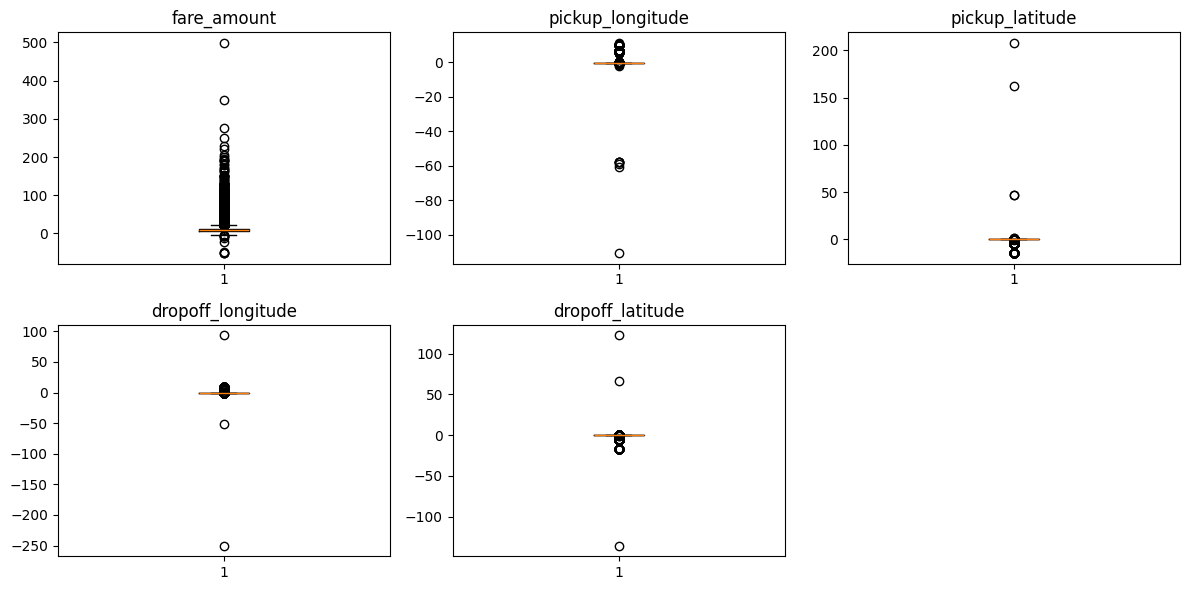

In [25]:
# Identifying Outliers
plt.figure(figsize = (12,6))

for i,col in enumerate(['fare_amount', 'pickup_longitude' , 'pickup_latitude' , 'dropoff_longitude' , 'dropoff_latitude']):
    plt.subplot(2,3,i+1)
    plt.boxplot(data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [31]:
# Remove Outliers
z_scores = stats.zscore(data[['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']])
abs_z_score = np.abs(z_scores)
filtered_entries  = (abs_z_score < 3).all(axis = 1)
data_cleaned = data[filtered_entries]
data_cleaned.head()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day,pickup_month
0,24238194,7.5,-0.128712,0.103940,-0.112387,0.117637,1,19,3,5
1,27835199,7.7,-0.128235,0.102628,-0.112020,0.121627,1,20,4,7
2,44984355,12.9,-0.129169,0.104253,-0.109570,0.124912,1,21,0,8
3,25894730,5.3,-0.126641,0.110738,-0.109780,0.129431,3,8,4,6
4,17610152,16.0,-0.122173,0.104682,-0.110372,0.123234,5,17,3,8


Unnamed: 0          -0.000383
fare_amount          1.000000
pickup_longitude     0.101466
pickup_latitude     -0.037327
dropoff_longitude    0.143626
dropoff_latitude    -0.054024
passenger_count      0.011592
pickup_hour         -0.022995
pickup_day           0.011652
pickup_month         0.029765
Name: fare_amount, dtype: float64


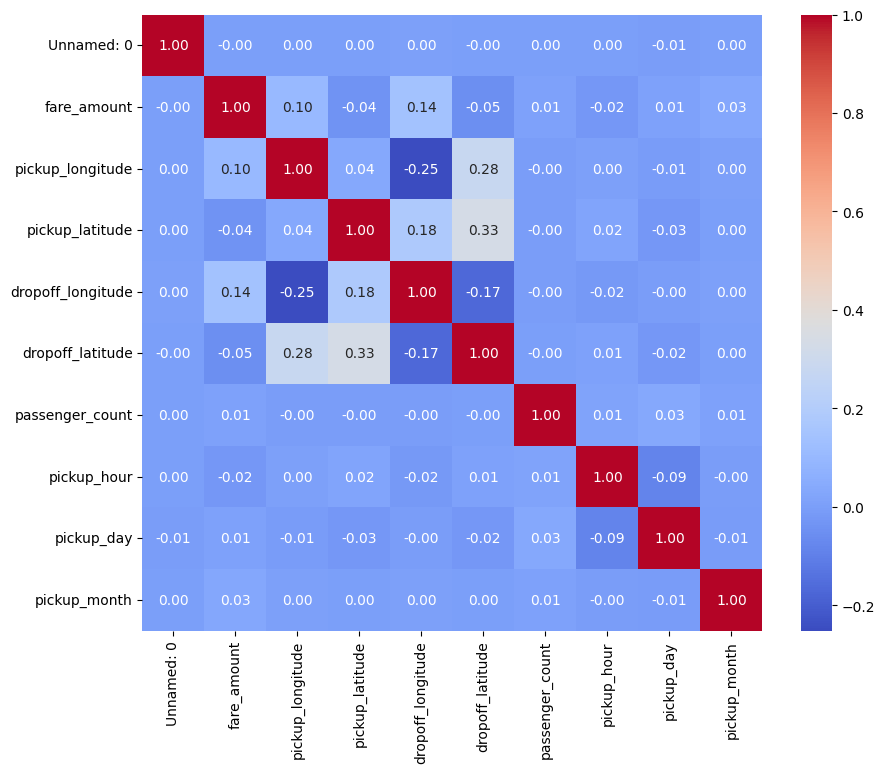

In [32]:
# Correlation Matrix
corr_matrix = data_cleaned.corr()
print(corr_matrix['fare_amount'])

plt.figure(figsize= (10,8))
sns.heatmap(corr_matrix,annot = True , cmap = 'coolwarm', fmt = '.2f')
plt.show()

In [34]:
# Linear,Ridge,Lasso

X = data_cleaned.drop('fare_amount' , axis = 1)
Y = data_cleaned['fare_amount']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [39]:
model_lr = LinearRegression()
model_lr.fit(X_train, Y_train)
Y_pred_lr = model_lr.predict(X_test)

r2_lr = r2_score(Y_test, Y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(Y_test, Y_pred_lr))

model_ridge = Ridge(alpha=1.0)  # Alpha is a regularization parameter
model_ridge.fit(X_train, Y_train)
Y_pred_ridge = model_ridge.predict(X_test)

r2_ridge = r2_score(Y_test, Y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(Y_test, Y_pred_ridge))

model_lasso = Lasso(alpha=0.1)  # Alpha is a regularization parameter
model_lasso.fit(X_train, Y_train)
Y_pred_lasso = model_lasso.predict(X_test)

r2_lasso = r2_score(Y_test, Y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(Y_test, Y_pred_lasso))

C:\Users\yash2\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.90391e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [40]:
print(f"Linear Regression R²: {r2_lr:.2f}, RMSE: {rmse_lr:.2f}")
print(f"Ridge Regression R²: {r2_ridge:.2f}, RMSE: {rmse_ridge:.2f}")
print(f"Lasso Regression R²: {r2_lasso:.2f}, RMSE: {rmse_lasso:.2f}")


Linear Regression R²: 0.07, RMSE: 6.20
Ridge Regression R²: 0.06, RMSE: 6.24
Lasso Regression R²: 0.00, RMSE: 6.43
